#### Plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titles=pd.read_csv('titles.csv',index_col=None,encoding='utf-8')


In [3]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
t=titles

In [5]:
t[t['title'] == 'Macbeth']

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [6]:
p= t['year'].value_counts()
p.plot()

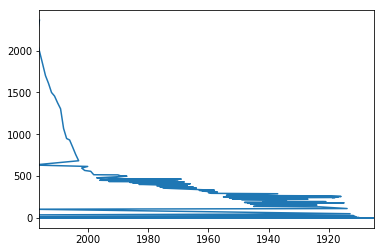

In [7]:
plt.show()

In [8]:
p.sort_index().plot()

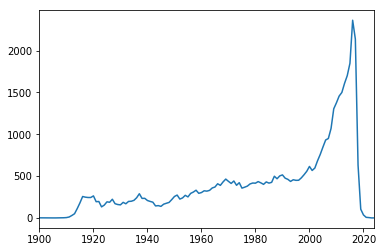

In [9]:
plt.show() #By This we can see number of movies are inreasing every year

#### Groupby with column-names: 
Count Values, the value of movies/year were counted using ‘count_values()’ method. Same can be
achieve by ‘groupby’ method as well. The ‘groupby’ command return an object, and we need to an additional
functionality to it to get some results

Size() -> counts the total number of rows each year and data is group by year therefor the result wil b e
similiar to count_values() command.

In [10]:
casts=pd.read_csv('/home/mkumar9824/Manoj_Doc/Machine_Learning_From_Scratch/Pandas/cast.csv',index_col=None,encoding='utf-8')


In [11]:
c=casts

In [12]:
cg=c.groupby(['year']).size()

In [15]:
cg.plot()

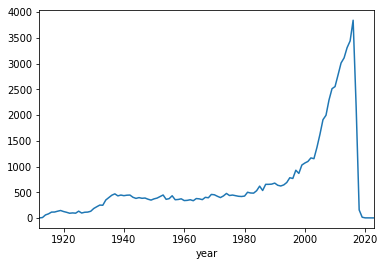

In [16]:
plt.show()

In [17]:
cf =c[c['name']=='Aaron Abrams']

In [12]:
cf.groupby(['year','title']).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
dtype: int64

In [13]:
cf.plot()

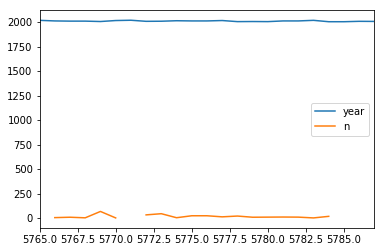

In [14]:
plt.show()

In [17]:
c.groupby(['year']).n.max().head()#we want to group the items by year
#and see the maximum rating in those years

year
1912     6.0
1913    14.0
1914    39.0
1915    14.0
1916    35.0
Name: n, dtype: float64

In [ ]:
#min rating year wise

In [18]:
c.groupby(['year']).n.min().head()

year
1912    6.0
1913    1.0
1914    1.0
1915    1.0
1916    1.0
Name: n, dtype: float64

In [19]:
#mean rating each year 
c.groupby(['year']).n.mean().head(10)

year
1912    6.000000
1913    4.142857
1914    7.085106
1915    4.236111
1916    5.037736
1917    5.446429
1918    5.596774
1919    5.138686
1920    5.052632
1921    4.989899
Name: n, dtype: float64

#### Groupby with custom field

In [31]:
# Suppose we need to create group by decade so we have to customize it 
decade=c['year']//10*10

In [42]:

c_dec=c.groupby(decade).n.size()

In [49]:
c_dec #results shows the total number of movies in each decade.

year
1910      669
1920     1121
1930     3448
1940     3997
1950     3892
1960     3743
1970     4343
1980     5554
1990     7652
2000    16199
2010    24376
2020        7
Name: n, dtype: int64

In [50]:
c_dec.plot()

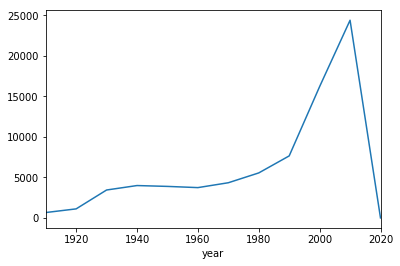

In [51]:
plt.show()

#### Unstack: 


In [52]:
c=casts

In [55]:
c.groupby([c['year']//10*10,'type']).size().head(10)
#c.groupby( [c['year']//10*10, 'type'] ).size().head(8)

year  type   
1910  actor       384
      actress     285
1920  actor       710
      actress     411
1930  actor      2628
      actress     820
1940  actor      3014
      actress     983
1950  actor      2877
      actress    1015
dtype: int64

Now we want to compare and plot the total number of actors and actresses in each decade, A simple solution to such problem is the ‘unstack’, which allows to create a new DataFrame based on the grouped Dataframe, as shown below

In [64]:
c = casts
c_decade=c.groupby(['type',c['year']//10*10]).size()

In [65]:
c_decade

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

Now we can create a new DataFrame using ‘unstack’ command.

In [63]:
c_df=c_decade.unstack()

NameError: name 'c_decade' is not defined

In [66]:
c_decade.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


In [67]:
c_decade.unstack().plot()

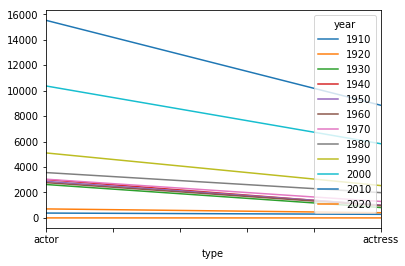

In [68]:
plt.show()

In [69]:
c_decade.unstack().plot(kind='bar')

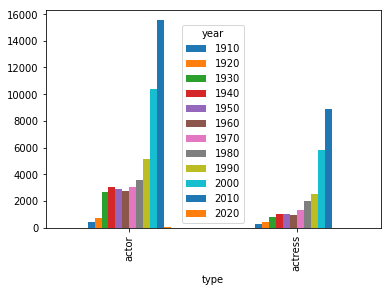

In [70]:
plt.show()

To plot the data side by side, use unstack(0) option as shown below (by default unstack(-1) is used),

In [73]:
c_decade.unstack(0).plot(kind='bar') #to show the side by side 

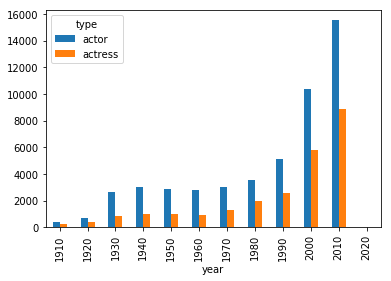

In [74]:
plt.show()